In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/train.csv')

/home/lunet/ttrmc/anaconda3/envs/MLE/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)
df_store = df[
    (df['Store']==4) & (df['Open']==1)
].reset_index(drop=True)
df_store = df_store.sort_values('ds', ascending=True)

In [4]:
from fbprophet import Prophet

def train_predict(df, train_index, Seasonality):
    # grab split data
    df_train = df.copy().iloc[0:train_index]
    df_test = df.copy().iloc[train_index:]
    
    model = Prophet(
        yearly_seasonality=Seasonality['yearly'],
        weekly_seasonality=Seasonality['weekly'],
        daily_seasonality=Seasonality['daily'],
        interval_width = 0.95
    )
    
    # train and predict
    model.fit(df_train)
    predicted = model.predict(df_test)
    return predicted, df_train, df_test

Importing plotly failed. Interactive plots will not work.


In [5]:
seasonality = {
    'yearly': True,
    'weekly': True,
    'daily': False
}

In [6]:
train_index = int(0.8*df_store.shape[0])
predicted, df_train, df_test = train_predict(
    df = df_store,
    train_index = train_index,
    Seasonality = seasonality
)

Initial log joint probability = -7.38985
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      96       1168.86    0.00064217       95.3325   7.924e-06       0.001      174  LS failed, Hessian reset 
      99       1168.89     0.0001734       74.1499      0.7113      0.7113      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       1168.92   4.53455e-08       77.3222      0.7255      0.7255      228   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/lunet/ttrmc/anaconda3/envs/MLE/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f8e6c00c9d0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


Text(0, 0.5, 'Sales')

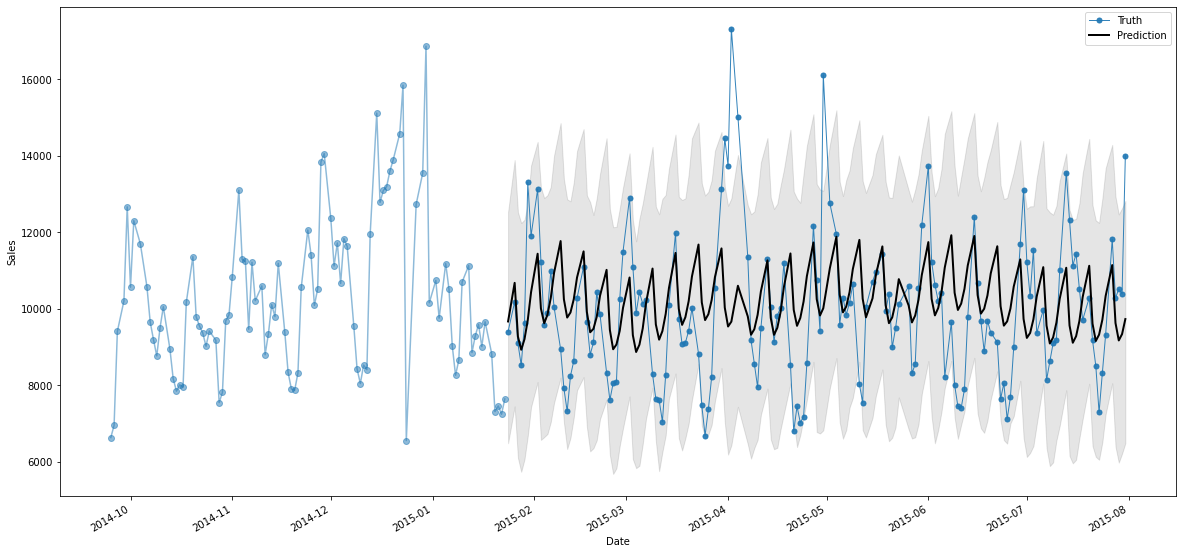

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

df_test.plot(x='ds', y='y', ax=ax, label='Truth', linewidth=1, markersize=5, color='tab:blue', alpha=0.9, marker='o')
predicted.plot(x='ds', y='yhat', ax=ax, label='Prediction', linewidth=2, markersize=5, color='k')
ax.fill_between(x=predicted['ds'], y1=predicted['yhat_upper'], y2=predicted['yhat_lower'], alpha=0.1, color='k')
df_train.iloc[train_index-100:].plot(x='ds', y='y', ax=ax, color='tab:blue', label='_nolegend_', alpha=0.5, marker='o')

ax.set_xlabel('Date')
ax.set_ylabel('Sales')